#2: Transform IVP $dy/dt=1-y^3$; $y(-1)=3$ into an equivalent problem with the initial point at the origin.

Sol'n: Replace $t\leftarrow t+1$ and $y\leftarrow y-3$ and the IVP becomes $dy/dt=1-(y-3)^3$; $y(0)=0$

This ode is separable so we can solve it: $\int \dfrac{dy}{1-y^3}dy=\int dt$

#4Suppose $y'=-y/2+t$; $y(0)=0$. Let $\phi_0(t)=0$ and define $\{\phi_n(t)\}$ by the method of successive approximations: $\phi_{n+1}(t)=\displaystyle\int\limits_0^tf(s,\phi_n(s))ds$

a. Determine $\phi_n(t)$ for an arbitrary value of $n$.

The plan is to compute successive approximations and try to suss out a pattern.

Sol'n: $\phi_1(t)=\displaystyle\int\limits_0^tf(s,0)ds=\int\limits_0^tsds=\dfrac{s^2}{2}\Big|_0^t=\dfrac{t^2}{2}$<br>
$\phi_2(t)=\displaystyle\int\limits_0^tf(s,s^2/2)ds=\int\limits_0^t-\dfrac{s^2}{4}+s\,ds=\dfrac{-s^3}{12}+\dfrac{s^2}{2}\Big|_0^t=-\dfrac{t^3}{12}+\dfrac{t^2}{2}=-\dfrac{t^3}{2\cdot(3\cdot 2)}+\dfrac{t^2}{2}$<br>

$\phi_3(t)=\displaystyle\int\limits_0^tf(s,s^3/(2(3\cdot 2))+s^2/2)ds=\int\limits_0^t\dfrac{s^3}{2^2(3\cdot 2)}-\dfrac{s^2}{2\cdot 2}+s\,ds=\dfrac{s^4}{2^2*4!}-\dfrac{s^3}{2(3\cdot 2)}+\dfrac{s^2}{2}\Big|_0^t=\dfrac{t^4}{2^2*4!}-\dfrac{t^3}{2(3\cdot 2)}+\dfrac{t^2}{2}=\sum\limits_{k=2}^4\dfrac{(-1)^kt^k}{2^{k-2}k!}=\sum\limits_{k=0}^4\dfrac{4(-t/2)^k}{k!}+2t-4$

The pattern will persist, so that $\phi_n=\sum\limits_{k=0}^{n+1}\dfrac{4(-t/2)^k}{k!}-2t+4\rightarrow 4e^{-t/2}+2t-4$ as $n\rightarrow\infty$

Well, that's enough hard pencil and paper work.  Here's a little script for cranking these things out...and graphing them!

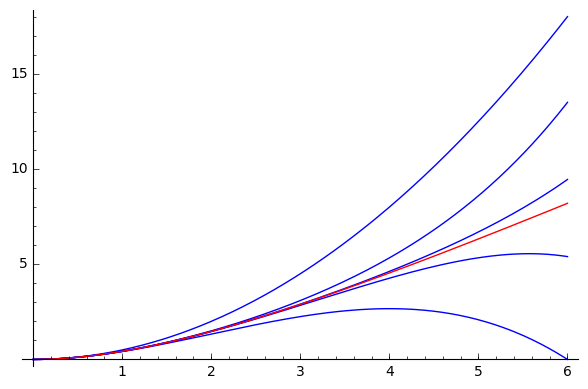

In [4]:
s,t = var('s t')
phi = function('phi')(s)
def f(t,y):
    return -y/2+t
phi=integral(f(s,0),(s,0,t))
show(phi)
p1 = plot(phi,(t,0,6))
for i in xrange(1,5):
    phi = integral(-phi(s)/2+s,(s,0,t))
    show(phi)
    p1 += plot(phi,(t,0,6))

p1+=plot(4*e^(-t/2)+2*t-4,(t,0,6),color='red')
show(p1)

b. Plot $\phi_n(t)$ for $n=1,\dots,4$. Observe whether the iterates appear to be converging.

SOLN:  See above.  Looks good!

c. Express $\lim\limits_{n\rightarrow\infty}\phi_n(t)=\phi(t)$ in terms of elementary functions; that is, solve the given initial value problem.

SOLN:  This was worked out above by sussing out the pattern of the Taylor series for $e^{-t/2}$.  Shall we give it a go the other way?<br>
The ode is linear: $\dfrac{dy}{dt}+\dfrac{1}{2}y=t$ has the integrating factor $e^{t/2}$, so we have $\dfrac{d}{dt}\left(e^{t/2}y\right)=te^{t/2}$ whence $e^{t/2}y=2(t-2)e^{t/2}+c$<br>
The initial conditions require $0=-4+c$, so $c=4$ and the solution is $y=2(t-2)+4e^{t/2}$

#8. Consider $y'=1−y^3, y(0)=0$<br>
let $\phi_0(t)=0$ and use the method of successive approximations to approximate the solution of the initial value problem.<br>
a. Calculate $\phi_1(t),\dots,\phi_3(t)$.

SOL'N: Here, $y$ is autonomous, so we can write $y'=f(y)$<br>
$\phi_1(t)=\displaystyle\int\limits_0^tf(0)ds=\int\limits_0^t1ds=s\Big|_0^t=t$<br>
$\phi_2(t)=\displaystyle\int\limits_0^tf(s)ds=\int\limits_0^t1-s^3\,ds=s-\dfrac{s^4}{4}\Big|_0^t=t-\dfrac{t^4}{4}$<br>

$\phi_3(t)=\displaystyle\int\limits_0^tf(s-s^4/4)ds=\int\limits_0^t1-\left(s-\dfrac{s^4}{4}\right)^3\,ds=t-\dfrac{t^4}{4}+\dfrac{3t^7}{7\cdot 4}-\dfrac{3t^{10}}{10\cdot 4^2}+\dfrac{t^{13}}{13\cdot 4^3}$

b. Plot $\phi_1(t),\dots,\phi_3(t)$ Observe whether the iterates appear to be converging.

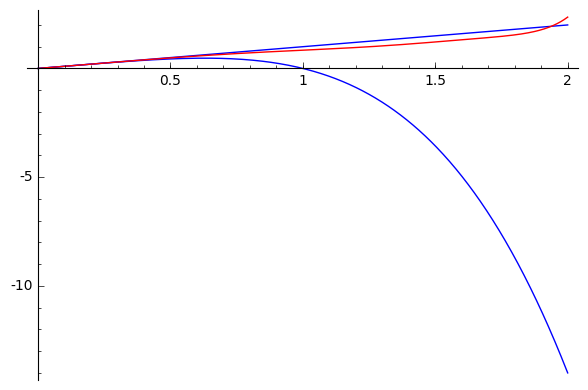

In [5]:
t = var('t')
p2 = plot(t,(t,0,2))
p2 += plot(t-t^4,(t,0,2))
p2 += plot(t-t^4/4+3*t^7/28-3*t^10/160+t^13/(13*64),(t,0,2),color='red')
show(p2)

It doesn't look great...what's going on?  Well, the equation is separable so we can solve it in explicit, closed form:<br>
$\displaystyle\int\dfrac{dy}{1-y^3}=\int dt$

Being lazy, I'll use Python's numpy to get the antiderivative:

In [7]:
y=var('y')
show(integral(1/(1-y^3),y))

...and...moving right along!

#10 Consider $y'=\dfrac{3t^2+4t+2}{2(y-1)},y(0)=0$<br>
Let $\phi_0(t)=0$ and use the method of successive approximations to approximate the solution of the initial value problem.

a. Calculate $\phi_1(t),\dots, \phi_4(t)$, or (if necessary) Taylor approximations to these iterates. Keep terms up to order six.

SOLN: 

$\phi_1(t)=\displaystyle\int\limits_0^tf(s,0)ds=\int\limits_0^t\dfrac{-3s^2}{2}-2s-1\,ds=\dfrac{-s^3}{2}-s^2-s\Big|_0^t=\dfrac{-t^3}{2}-t^2-t$<br>
$\phi_2(t)=\displaystyle\int\limits_0^tf(s,\dfrac{-s^3}{2}-s^2-s)ds=-\int\limits_0^t\dfrac{3s^2+4s+2}{s^3+2s^2+2s+2}\,ds=-\ln|t^3+2t^2+2t+2|+\ln(2)$<br>


In [14]:
s,t = var('s t')
assume(t>0)phi = function('phi')(s)
def f(t,y):
    return (3*t^2+4*t+2)/(2*(y-1))

phi=integral(f(s,0),(s,0,t))
show(phi)
p1 = plot(phi,(t,0,6))
for i in xrange(1,3):
    #phi = -phi(s)/2+s
    phi(t)=integral(f(s,phi(s)),(s,0,t))
    show(phi)
    p1 += plot(phi,(t,0,6))

p1+=plot(1+sqrt(t^3+2*t^2+2*t+1),(t,0,6),color='red')
p1+=plot(1-sqrt(t^3+2*t^2+2*t+1),(t,0,6),color='red')

show(p1)

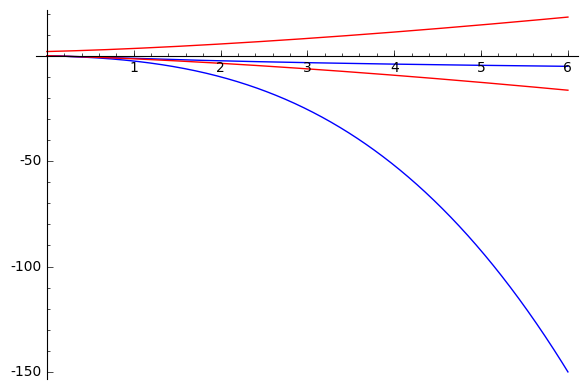

In [17]:
p1+=plot(1+sqrt(t^3+2*t^2+2*t+1),(t,0,6),color='red')
p1+=plot(1-sqrt(t^3+2*t^2+2*t+1),(t,0,6),color='red')
show(p1)

In [3]:
t=var('t')
y = function('y')(t)
de = 2*(y-1)*diff(y,t)-3*t^2-4*t-2
h = desolve(de, y,ics=[0,0])
show(h)

#14 If $\partial f/\partial y$ is continuous in the rectangle $D$, show that there is a <br>
positive constant $K$ such that $|f(t,y_1)−f(t,y_2)|\leq K|y_1−y_2|$, (31)<br>
where $(t,y_1)$ and $(t,y_2)$ are any two points in $D$ having the same $t$ coordinate.<br>
This inequality is known as a Lipschitz condition.<br>
Hint: Hold $t$ fixed and use the mean value theorem on $f$ as a function<br>
of $y$ only. Choose $K$ to be the maximum value of $|\partial f/\partial y|$ in $D$.

SOLN:  Fix a value of $t$ so that the vertical line segment in the $ty$ plane from $(t,y_1)$ to $(t,y_2)$ is contained in the rectangle, $D$.<br>
Following the hint, we recall that the mean value theorem guarantees that if $y=f(t,y)$ is differentiable<br>
on $(y_1,y_2)$ then there exists $c\in(y_1,y_2)$ such that $(y_2-y_1)f'(t,c)=f(t,y_2)-f(t,y_1)$. <br>
Swapping sides, and equating the absolute values, $|f(t,y_2)-f(t,y_1)|=|f'(t,c)||(y_2-y_1)|$ <br>
Since, by assumption, $f$ is continuous in the interval, $|f'(t,y)|$ is bounded by some finite value, $K$.

#15 and 16 If $\phi_{n−1}(t)$ and $\phi_n(t)$ are members of the sequence $\{\phi_k(t)\}$, use<br>
the result of Problem 14 to show that $f'(t,\phi_n(t))−f'(t,\phi_{n−1}(t)\leq K|\phi_n(t)−\phi_{n−1}(t)|$.

SOLN:  Proof by induction may work here.  Start with $\phi_1(t)-\phi_0(t)|=|\phi_1(t)|\leq\displaystyle\int\limits_0^t|f(s,0)|ds\leq Ms\Big|_0^t=Mt$ <br>
where $M$ is an upper bound on the partial derivative in $D$.<br>
Further, look at $|\phi_2(t)-\phi_1(t)|=\Big|\displaystyle\int_0^t(f(s,\phi_1(s))-f(s,0))ds\Big|\leq\int_0^t\Big|f(s,\phi_1(s))-f(s,0))\Big|ds$<br>
This was shown in problem 14, to be $\leq\displaystyle\int_0^tK|\phi_1(s)-0|ds\leq KN\int_0^t|s|ds=\dfrac{1}{2}KMt^2$<br>
Now the inductive hypothesis is that $|\phi_k(t)-\phi_{k-1}(t)|\leq\dfrac{MK^{k-1}t^k}{k!}$ for some $k$. Then<br>
$|\phi_k(t)-\phi_{k-1}(t)|\leq\displaystyle\int_0^t|f(s,\phi_k(s))-f(s,\phi_{k-1}(s))|ds\leq\int_0^tK|\phi_k(s)-\phi_{k-1}(s)|ds\leq\int_0^tK\dfrac{MK^{k-1}s^k}{k!}ds=\dfrac{MK^kt^{k+1}}{(k+1)!}$, completing the proof by induction.

#17. Note that $\phi_n(t)=\phi_1(t)+(\phi_2(t)-\phi_1(t))+\cdots+(\phi_n(t)-\phi_{n-1}(t))$<br>
a. Then, by the triangle inequality, $|\phi_n(t)|\leq |\phi_1(t)|+|\phi_2(t)−\phi_1(t)|+\cdots+|\phi_n(t)−\phi_{n−1}(t)|$.<br>
b. And by the results of Problem 16, if $|t|<h$, then $\phi_1$ is bount by the "bow tie" and so $\phi_1(t)\leq Mh$.  <br>
Further, each successive difference has $|\phi_n(t)-\phi_{n-1}(t)|\leq\dfrac{MK^{n-1}h^n}{n!}$.<br>
Thus by the triangle inequality, $|\phi_n(t)|\leq \dfrac{M}{K}\left(Kh+\dfrac{(Kh)^2}{2!}+\cdots+\dfrac{(Kh)^n}{n!}\right)$.

c. Show that the sum in part b converges as $n\rightarrow\infty$ and, hence,<br>
the sum in part a also converges as $n\rightarrow\infty$. Conclude therefore<br>
that the sequence $\{\phi_n(t)\}$ converges since it is the sequence of,br>
partial sums of a convergent infinite series.

SOLN: The sequence of partial sums converges to $MK(e^{Kh}-1)$.  Using the comparison test<br>
(remember Chapter 11 of 1B?!) the terms of part a must also converge and so the $n$th term must
go to zero: $|\phi_n(t)-\phi_{n-1}(t)|\rightarrow 0\Rightarrow  \{\phi_n(t)\}$ is convergent.